In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import seaborn as sns

# Constants

In [3]:
PATH_DATA = Path.cwd().parent.parent.parent / 'data'
PATH_DATA.exists()

True

In [4]:
PATH_SCRAPED = PATH_DATA / "raw" / "scraped"
PATH_SCRAPED.exists()

True

In [5]:
PATH_RESULTS_ARCHAEA = (PATH_DATA / "results" / "archaea")
PATH_RESULTS_ARCHAEA.exists()

True

In [6]:
PATH_TAXONOMY_ARCHAEA = (PATH_SCRAPED / "archaea" / "taxonomy")
PATH_TAXONOMY_ARCHAEA.exists()

True

# Data Extraction

In [7]:
df_archaea = pd.read_csv(PATH_RESULTS_ARCHAEA / 'mfa_archaea.csv', sep=';', dtype=str)
df_archaea = df_archaea.replace({',': '.'}, regex=True)
df_archaea = df_archaea.apply(pd.to_numeric, errors='ignore')
df_archaea

C:\Users\Diego\AppData\Local\Temp\ipykernel_53880\1059225361.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_archaea = df_archaea.apply(pd.to_numeric, errors='ignore')


,name,url,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq
0,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-20.0,-61.994322,2.952111,0.998501,1.351540
1,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-19.0,-58.900917,2.945046,0.998499,1.351540
2,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-18.0,-55.807529,2.937238,0.998497,1.351540
3,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-17.0,-52.714165,2.928565,0.998494,1.351540
4,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-16.0,-49.620837,2.918873,0.998492,1.351540
...,...,...,...,...,...,...,...,...,...,...
195647,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,16.0,24.122574,1.608172,0.997867,1.240771
195648,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,17.0,25.639228,1.602452,0.997806,1.240771
195649,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,18.0,27.154290,1.597311,0.997750,1.240771
195650,Vulcanisaeta_thermophila,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_thermophila_segment_3,674198,0.490012,19.0,28.668059,1.592670,0.997698,1.240771


In [8]:
df_archaea.dtypes

name           object
url            object
sequence       object
seq_length      int64
GC_content    float64
Q             float64
Tau(Q)        float64
D(Q)          float64
r_squared     float64
Delta_Dq      float64
dtype: object

## Data Preparation

In [9]:
df_composite_key_archaea = df_archaea.drop_duplicates(subset=['GC_content', 'Delta_Dq', 'sequence'])
df_composite_key_archaea.shape

(4772, 10)

In [10]:
# if 'sequence' ends in 'segment_1' -> df_composite_key_archaea['segment'] = 1
# if 'sequence' ends in 'segment_2' -> df_composite_key_archaea['segment'] = 2
# if 'sequence' ends in 'segment_3' -> df_composite_key_archaea['segment'] = 3
# else -> df_composite_key_archaea['segment'] = -1

df_composite_key_archaea['segment'] = np.where(
    df_composite_key_archaea['sequence'].str.endswith('segment_1'), 1,
    np.where(
        df_composite_key_archaea['sequence'].str.endswith('segment_2'), 2,
        np.where(
            df_composite_key_archaea['sequence'].str.endswith('segment_3'), 3,
            -1  # default value if none of the conditions are met
        )
    )
)

C:\Users\Diego\AppData\Local\Temp\ipykernel_53880\2466586683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_composite_key_archaea['segment'] = np.where(


In [11]:
df_full_genomes_archaea = df_composite_key_archaea[df_composite_key_archaea['segment'] == -1]
df_full_genomes_archaea.shape

(1193, 11)

## DeltaDq vs GC

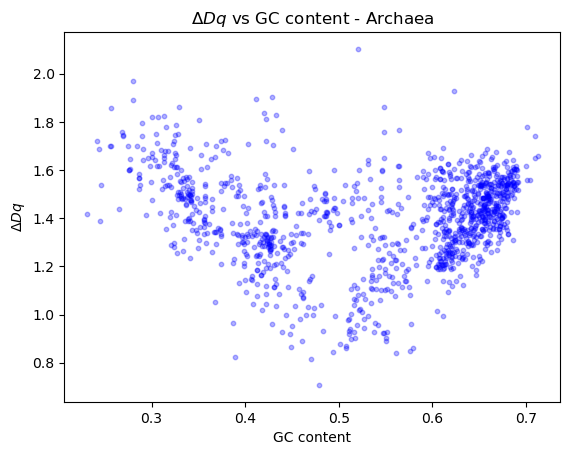

In [12]:
plt.scatter(
    x=df_full_genomes_archaea['GC_content'],
    y=df_full_genomes_archaea['Delta_Dq'],
    s=10,
    c='blue',
    alpha=0.3
)

plt.title(r'$\Delta Dq$ vs GC content - Archaea')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

plt.show()

## Taxonomy

In [13]:
df_tax_archaea = pd.read_json(PATH_TAXONOMY_ARCHAEA / 'taxonomy_archaea.json', dtype=str)
df_tax_archaea = df_tax_archaea.rename(columns={'organism_name': 'name'})
df_tax_archaea #[:50]

,url,name,no rank,superkingdom,kingdom,phylum,clade,class,order,family,genus
0,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,ANME-2_cluster_archaeon_HR1,cellular organisms,Archaea,Methanobacteriati,Methanobacteriota,Stenosarchaea group,Methanomicrobia,Methanosarcinales,nan,nan
1,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,Acidianus_infernus,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Sulfolobales,Sulfolobaceae,Acidianus
2,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,Acidianus_brierleyi,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Sulfolobales,Sulfolobaceae,Acidianus
3,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,Acidianus_sp._HS-5,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Sulfolobales,Sulfolobaceae,Acidianus
4,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,Acidianus_sp._RZ1,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Sulfolobales,Sulfolobaceae,Acidianus
...,...,...,...,...,...,...,...,...,...,...,...
1227,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,uncultured_Methanosphaera_sp.,cellular organisms,Archaea,Methanobacteriati,Methanobacteriota,Methanomada group,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera
1228,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,uncultured_Nitrososphaera_sp.,cellular organisms,Archaea,Thermoproteati,Nitrososphaerota,nan,Nitrososphaeria,Nitrososphaerales,Nitrososphaeraceae,Nitrososphaera
1229,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,uncultured_archaeon_A07HN63,cellular organisms,Archaea,nan,nan,nan,nan,nan,nan,nan
1230,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,uncultured_archaeon_A07HR60,cellular organisms,Archaea,nan,nan,nan,nan,nan,nan,nan


In [14]:
df_combined_archaea = pd.merge(df_full_genomes_archaea, df_tax_archaea, on='name', how='left')
df_combined_archaea


,name,url_x,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq,...,url_y,no rank,superkingdom,kingdom,phylum,clade,class,order,family,genus
0,Acidianus_ambivalens,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_ambivalens,2326940,0.343665,-20.0,-61.994322,2.952111,0.998501,1.351540,...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Sulfolobales,Sulfolobaceae,Acidianus
1,Acidianus_brierleyi,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_brierleyi,2947156,0.319039,-20.0,-64.156670,3.055080,0.998791,1.538267,...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Sulfolobales,Sulfolobaceae,Acidianus
2,Acidianus_hospitalis,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_hospitalis,2137654,0.341481,-20.0,-64.891563,3.090074,0.994870,1.495359,...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,Acidianus_infernus,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_infernus,2222414,0.343625,-20.0,-63.258175,3.012294,0.998320,1.415934,...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Sulfolobales,Sulfolobaceae,Acidianus
4,Acidianus_manzaensis,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,acidianus_manzaensis,2687463,0.306201,-20.0,-65.623114,3.124910,0.992721,1.615672,...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Sulfolobales,Sulfolobaceae,Acidianus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,Vulcanisaeta_sp._EB80,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_sp._eb80,1557272,0.605719,-20.0,-56.884303,2.708776,0.995759,1.208065,...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Thermoproteales,Thermoproteaceae,Vulcanisaeta
1189,Vulcanisaeta_sp._JCM_14467,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_sp._jcm_14467,2443876,0.467266,-20.0,-61.228389,2.915638,0.979566,1.335712,...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Thermoproteales,Thermoproteaceae,Vulcanisaeta
1190,Vulcanisaeta_sp._JCM_16159,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_sp._jcm_16159,2249042,0.452751,-20.0,-59.159619,2.817125,0.987348,1.273382,...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Thermoproteales,Thermoproteaceae,Vulcanisaeta
1191,Vulcanisaeta_sp._JCM_16161,https://ftp.ncbi.nlm.nih.gov/genomes/refseq/ar...,vulcanisaeta_sp._jcm_16161,2286599,0.459312,-20.0,-60.485456,2.880260,0.976241,1.340111,...,https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/...,cellular organisms,Archaea,Thermoproteati,Thermoproteota,nan,Thermoprotei,Thermoproteales,Thermoproteaceae,Vulcanisaeta


In [15]:
taxonomy_columns = ['superkingdom', 'kingdom', 'phylum', 'clade', 'class', 'order', 'family', 'genus']
df_combined_archaea[taxonomy_columns] = df_combined_archaea[taxonomy_columns].apply(lambda col: col.mask(col.isna(), pd.NA))
df_combined_archaea[taxonomy_columns] = df_combined_archaea[taxonomy_columns].replace('nan', pd.NA)
df_combined_archaea['superkingdom'].unique()

array(['Archaea', <NA>], dtype=object)

In [16]:
# Define the columns of interest
taxonomy_columns = ['superkingdom', 'kingdom', 'phylum', 'clade', 'class', 'order', 'family', 'genus']

# Calculate unique counts for each column
unique_counts = {column: df_combined_archaea[column].nunique() for column in taxonomy_columns}

# Convert the dictionary to a DataFrame for better readability
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Count'])

# Display the DataFrame
unique_counts


{'superkingdom': 1,
 'kingdom': 4,
 'phylum': 12,
 'clade': 6,
 'class': 24,
 'order': 38,
 'family': 57,
 'genus': 179}

In [18]:
# Define the taxonomic rank
taxonomic_rank = 'kingdom'

# Calculate the frequency counts
frequent_taxas = df_combined_archaea[taxonomic_rank].value_counts()

# Define the number of top categories you want to plot
N = 4  # You can change this number as needed

# Get the top N categories
categories = frequent_taxas.index[:N]

# Filter the DataFrame to include only the desired categories
df_filtered = df_combined_archaea[df_combined_archaea[taxonomic_rank].isin(categories)]
print(len(frequent_taxas))
frequent_taxas[:15]

4


kingdom
Methanobacteriati    808
Thermoproteati       139
Nanobdellati          12
Promethearchaeati      2
Name: count, dtype: int64

<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:35: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_53880\3742325688.py:35: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta Dq$ vs GC content by {taxonomic_rank.capitalize()} - Archaea')


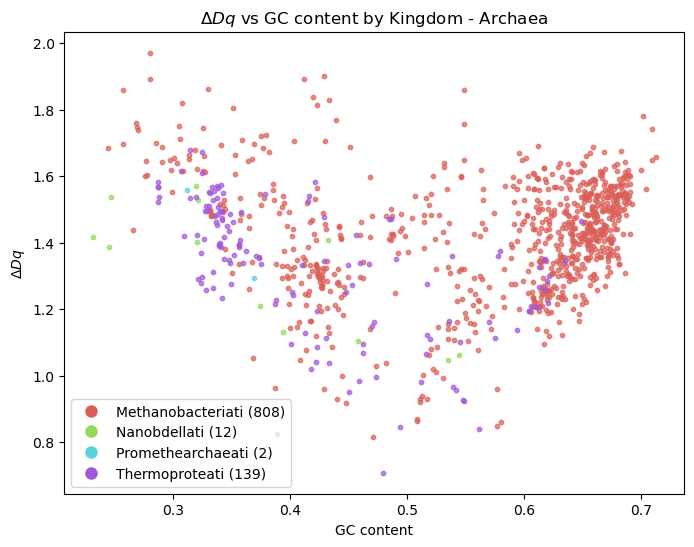

In [19]:
colors = sns.color_palette('hls', N)

plt.figure(figsize=(8, 6))

legend_handles = []

# Loop over each unique category and plot separately
for i, (category, group) in enumerate(df_filtered.groupby(taxonomic_rank)):
    num_points = len(group)

    if not category:
        continue

    plt.scatter(    
        x=group['GC_content'],
        y=group['Delta_Dq'],
        s=10,
        color=colors[i],  # Assign a unique color from the color palette
        alpha=0.7,
        label=category
    )

    # Create a custom legend handle with full opacity
    legend_handle = Line2D(
        [0], [0],
        marker='o',
        color='w',
        label=f'{category} ({num_points})',
        markerfacecolor=colors[i],
        markersize=10
    )
    legend_handles.append(legend_handle)

# Add plot title and labels
plt.title(f'$\Delta Dq$ vs GC content by {taxonomic_rank.capitalize()} - Archaea')
plt.xlabel('GC content')
plt.ylabel(r'$\Delta Dq$')

# Show legend with custom handles
plt.legend(handles=legend_handles)#, title=taxonomic_rank.capitalize())

# Display plot
plt.show()

<>:44: SyntaxWarning: invalid escape sequence '\D'
<>:44: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_54392\3553449803.py:44: SyntaxWarning: invalid escape sequence '\D'
  ax.set_title(f'$\Delta Dq$ vs GC content by {taxonomic_rank} - Archaea')


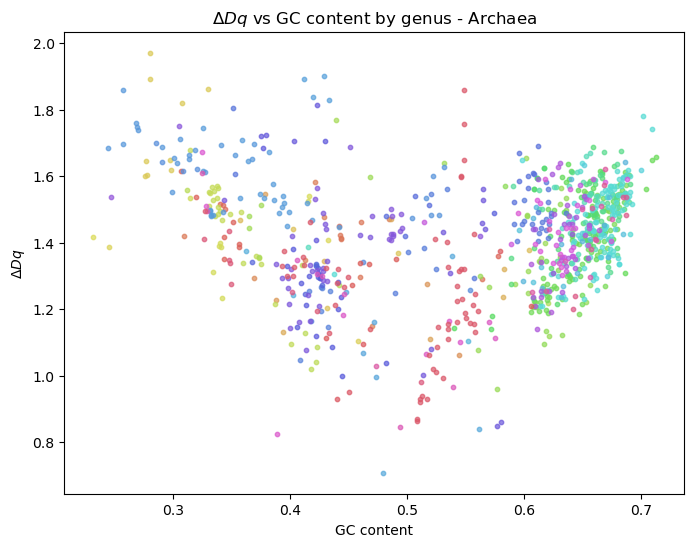

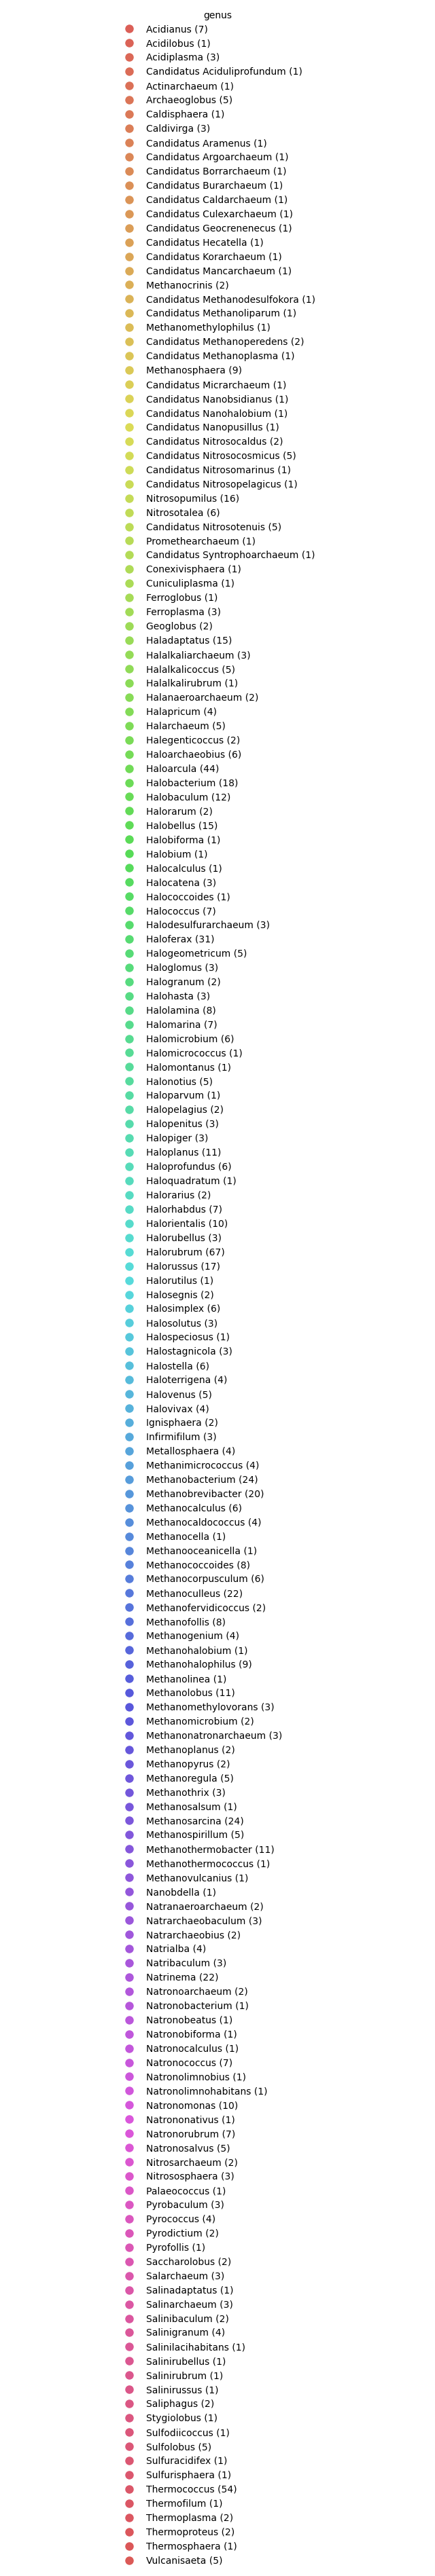

In [18]:
taxonomic_rank = 'genus'

categories = df_combined_archaea[taxonomic_rank].dropna().unique()
N = len(categories)

# Generate a color palette with enough colors for all categories
colors = sns.color_palette('hls', N)

# Create a dictionary to map categories to colors
category_colors = dict(zip(categories, colors))

# Initialize the legend handles list
legend_handles = []

# Create the main plot
fig, ax = plt.subplots(figsize=(8, 6))

# Loop over each unique category and plot separately
for category in categories:
    group = df_combined_archaea[df_combined_archaea[taxonomic_rank] == category]
    num_points = len(group)
    
    # Plot the data points for the current category
    ax.scatter(
        x=group['GC_content'],
        y=group['Delta_Dq'],
        s=10,
        color=category_colors[category],
        alpha=0.7
    )
    
    # Create a custom legend handle
    legend_handle = Line2D(
        [0], [0],
        marker='o',
        color='w',
        label=f'{category} ({num_points})',
        markerfacecolor=category_colors[category],
        markersize=10
    )
    legend_handles.append(legend_handle)

# Add plot title and labels
ax.set_title(f'$\Delta Dq$ vs GC content by {taxonomic_rank} - Archaea')
ax.set_xlabel('GC content')
ax.set_ylabel(r'$\Delta Dq$')

# Display the main plot without the legend
plt.show()

# Create a separate figure for the legend
fig_leg = plt.figure(figsize=(8, 6))
fig_leg.legend(
    handles=legend_handles,
    title=taxonomic_rank,
    loc='center',
    frameon=False
)
fig_leg.canvas.draw()

# Remove axes and ticks from the legend figure
plt.axis('off')

# Display the legend figure
plt.show()


In [19]:
# taxonomy_columns = ['superkingdom', 'kingdom', 'phylum', 'clade', 'class', 'order', 'family', 'genus']


In [20]:
taxonomic_rank = 'genus'

# Calculate the frequency counts
frequency_counts = df_combined_archaea[taxonomic_rank].value_counts()

# Define the number of top categories you want to plot individually
N = 10  # You can change this number to suit your needs

# Get the top N categories
top_categories = frequency_counts.index[:N]

# Total number of data points (excluding NaNs)
total_points = df_combined_archaea[taxonomic_rank].notna().sum()
print(frequency_counts.shape)
frequency_counts[:10]


(179,)


genus
Halorubrum            67
Thermococcus          54
Haloarcula            44
Haloferax             31
Methanosarcina        24
Methanobacterium      24
Methanoculleus        22
Natrinema             22
Methanobrevibacter    20
Halobacterium         18
Name: count, dtype: int64

<>:60: SyntaxWarning: invalid escape sequence '\D'
<>:60: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Diego\AppData\Local\Temp\ipykernel_54392\1167761937.py:60: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta Dq$ vs GC content for {taxonomic_rank}: {category} - Archaea')


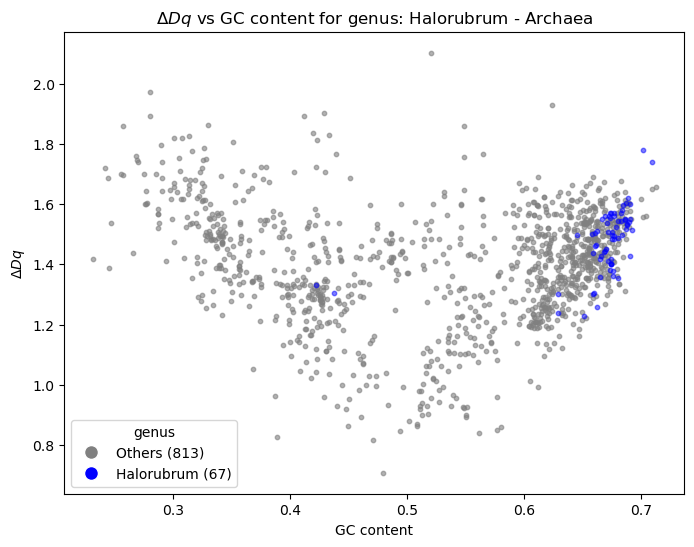

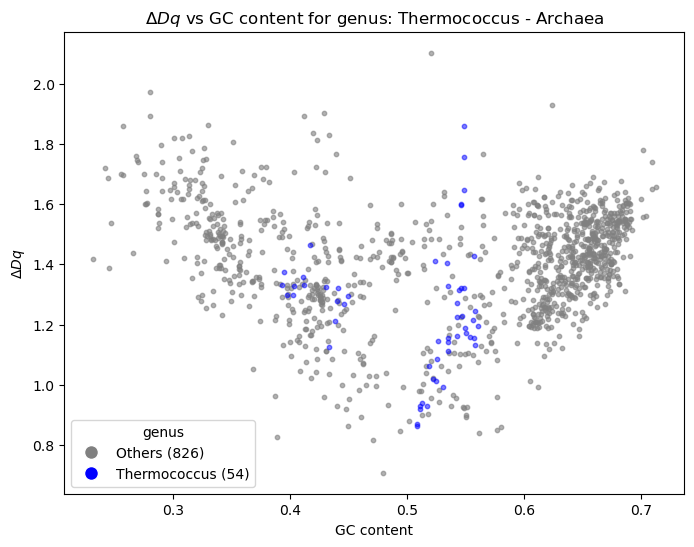

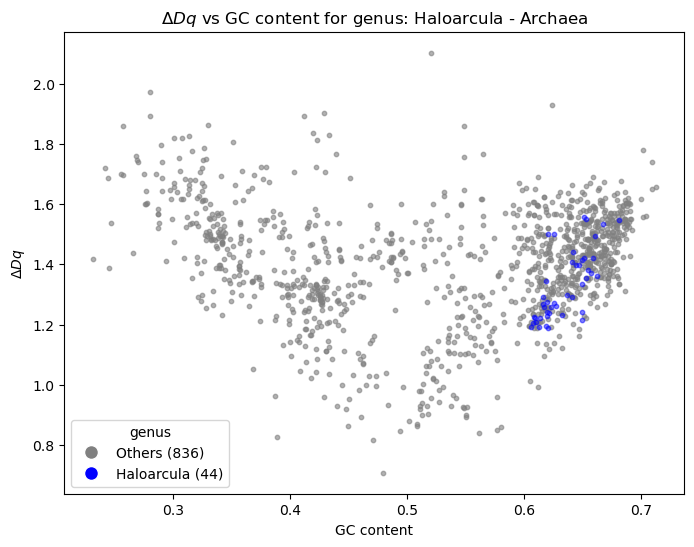

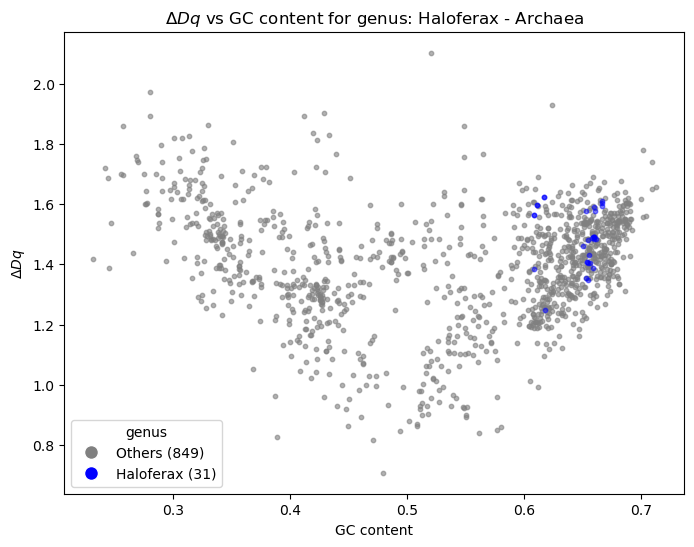

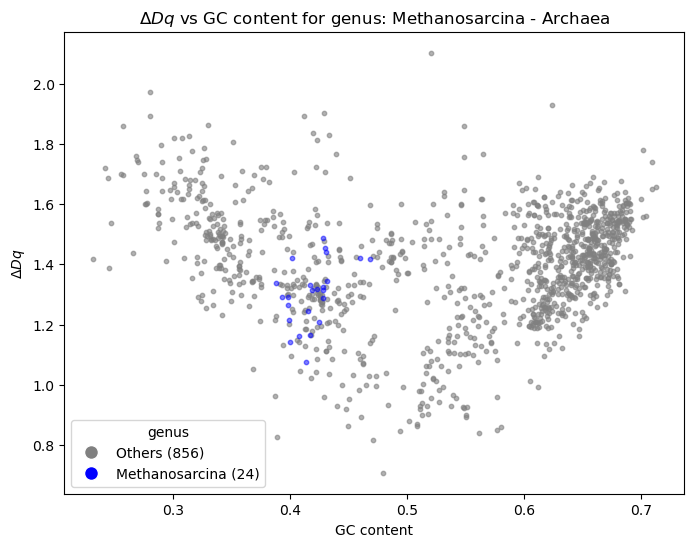

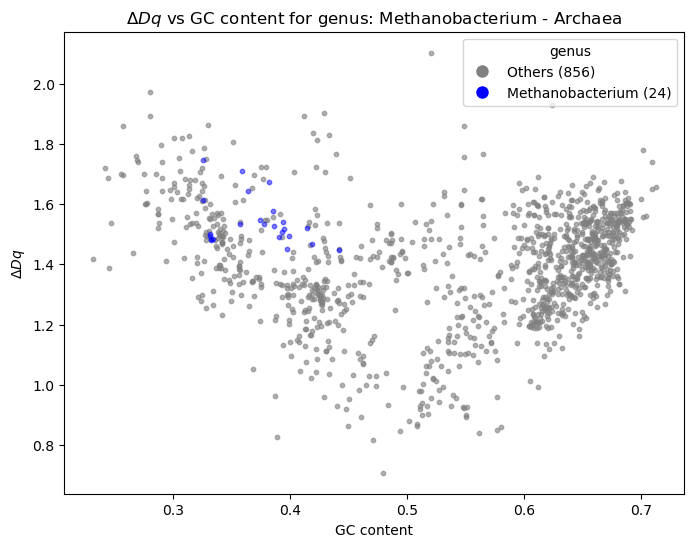

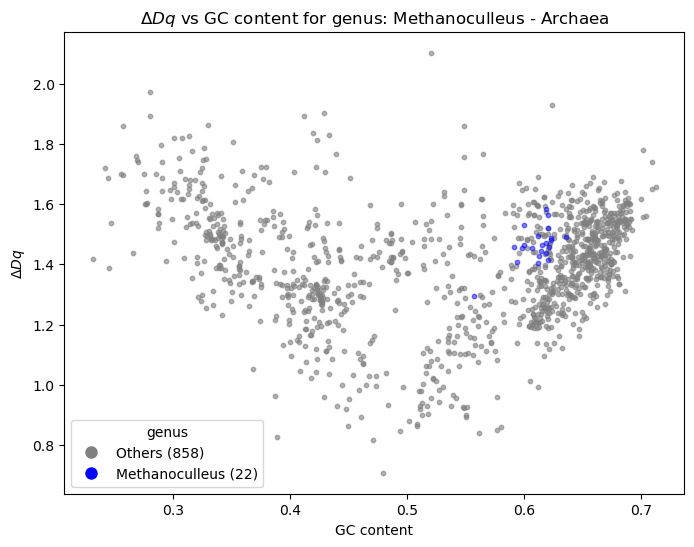

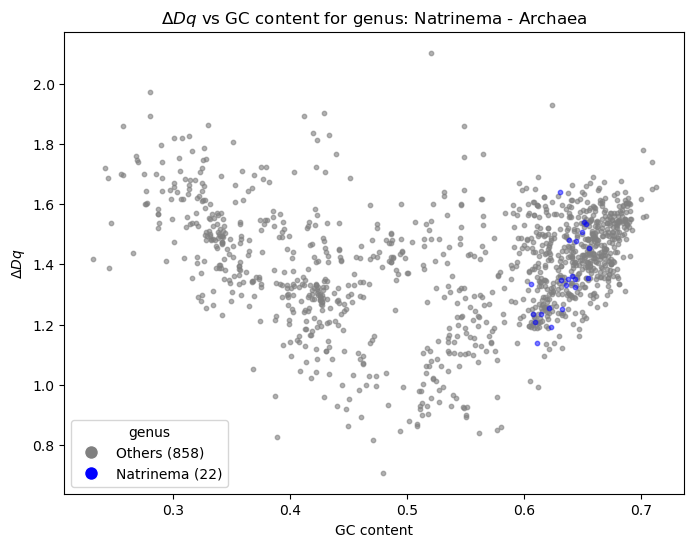

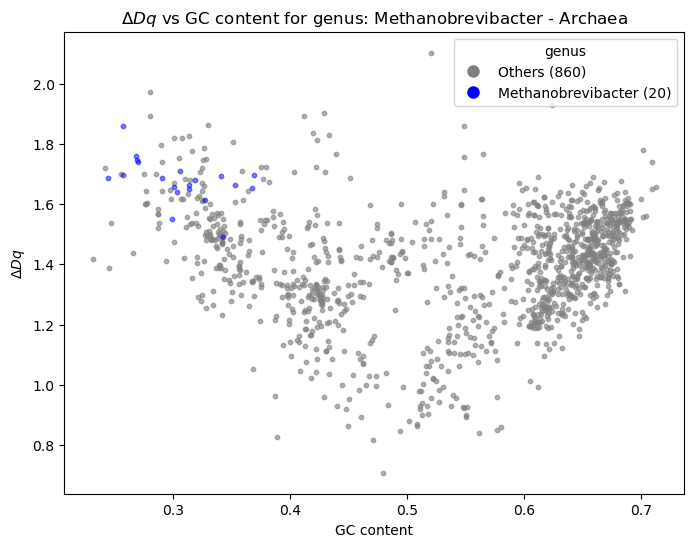

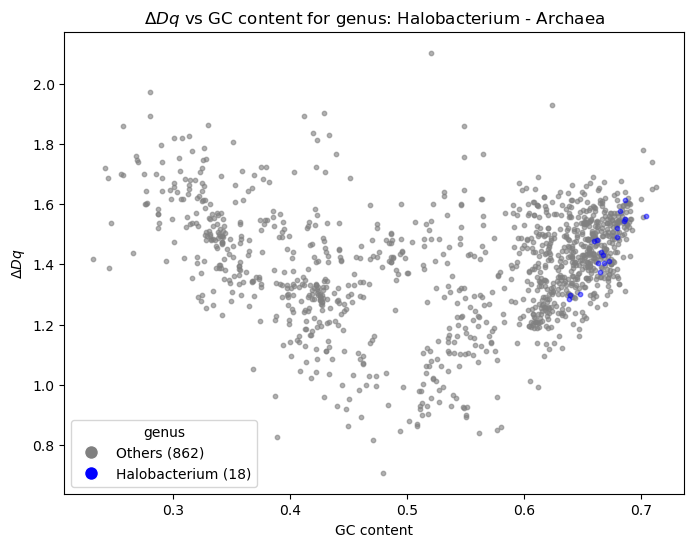

In [21]:
# Assuming 'N' and 'top_categories' have been defined earlier in your code
# Generate a list of high-contrast colors
colors = sns.color_palette('Set3', N)

# Define the neutral background color
background_color = 'gray'

# Iterate over each of the top categories to create individual plots
for i, category in enumerate(top_categories):
    plt.figure(figsize=(8, 6))
    
    # Filter data for the current category
    category_data = df_combined_archaea[df_combined_archaea[taxonomic_rank] == category]
    num_points = len(category_data)
    
    # Plot all data points in the background color (excluding the current category)
    background_data = df_combined_archaea[df_combined_archaea[taxonomic_rank] != category]
    plt.scatter(
        x=background_data['GC_content'],
        y=background_data['Delta_Dq'],
        s=10,
        color=background_color,
        alpha=0.6,
        label='_nolegend_'  # Prevent automatic legend entry
    )
    
    # Highlight the current category with a distinct color
    plt.scatter(
        x=category_data['GC_content'],
        y=category_data['Delta_Dq'],
        s=10,
        color='blue',  # Use 'colors[i]' if you want different colors per category
        alpha=0.5,
        label='_nolegend_'  # Prevent automatic legend entry
    )
    
    # Create custom legend handles with alpha=1 (fully opaque)
    legend_handles = [
        Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=f'Others ({total_points - num_points})',
            markerfacecolor=background_color,
            markersize=10,
            alpha=1  # Ensure full opacity
        ),
        Line2D(
            [0], [0],
            marker='o',
            color='w',
            label=f'{category} ({num_points})',
            markerfacecolor='blue',  # Or colors[i] if using the color palette
            markersize=10,
            alpha=1  # Ensure full opacity
        )
    ]
    
    # Add plot title and labels
    plt.title(f'$\Delta Dq$ vs GC content for {taxonomic_rank}: {category} - Archaea')
    plt.xlabel('GC content')
    plt.ylabel(r'$\Delta Dq$')
    
    # Show legend with custom handles
    plt.legend(handles=legend_handles, title=taxonomic_rank)
    
    # Optionally, save the plot to a file
    # plt.savefig(f'plot_{category}.png')
    
    # Display plot
    plt.show()


## Stacked Histograms

In [22]:
df_combined_archaea[df_combined_archaea['family'] == 'streptomycetaceae']

,name,url_x,sequence,seq_length,GC_content,Q,Tau(Q),D(Q),r_squared,Delta_Dq,...,url_y,no rank,superkingdom,kingdom,phylum,clade,class,order,family,genus


In [23]:
df_combined_archaea.shape

(1193, 21)

In [24]:
df_combined_archaea['family'].unique()

array(['Sulfolobaceae', <NA>, 'Acidilobaceae', 'Ferroplasmaceae',
       'Halobacteriaceae', 'Archaeoglobaceae', 'Caldisphaeraceae',
       'Thermoproteaceae', 'Candidatus Borrarchaeaceae',
       'Candidatus Burarchaeaceae', 'Candidatus Caldarchaeaceae',
       'Candidatus Calditenuaceae', 'Candidatus Culexarchaeaceae',
       'Candidatus Wolframiiraptoraceae', 'Candidatus Hecatellaceae',
       'Candidatus Korarchaeaceae', 'Methanotrichaceae',
       'Candidatus Methanoliparaceae', 'Candidatus Methanollivieraceae',
       'Methanomethylophilaceae', 'Candidatus Methanoperedenaceae',
       'Methanomassiliicoccaceae', 'Methanobacteriaceae',
       'Candidatus Micrarchaeaceae', 'Nanopusillaceae',
       'Candidatus Nanohalobiaceae', 'Candidatus Nitrosocaldaceae',
       'Nitrososphaeraceae', 'Nitrosopumilaceae', 'Nitrosotaleaceae',
       'Promethearchaeaceae', 'Conexivisphaeraceae',
       'Cuniculiplasmataceae', 'Desulfurococcaceae', 'Haladaptataceae',
       'Haloferacaceae', 'Haloco

In [25]:
df_combined_archaea.columns[-8:]

Index(['superkingdom', 'kingdom', 'phylum', 'clade', 'class', 'order',
       'family', 'genus'],
      dtype='object')

In [103]:
taxonomic_rank = 'genus'
N = 9
frequency_counts = df_combined_archaea[taxonomic_rank].value_counts()

# Get the top N categories based on frequency
top_categories = frequency_counts.index[:N]

# Filter the DataFrame to include only the desired categories
df_filtered = df_combined_archaea[df_combined_archaea[taxonomic_rank].isin(top_categories)]
print(len(frequency_counts))
frequency_counts[:12]


179


genus
Halorubrum            67
Thermococcus          54
Haloarcula            44
Haloferax             31
Methanosarcina        24
Methanobacterium      24
Methanoculleus        22
Natrinema             22
Methanobrevibacter    20
Halobacterium         18
Halorussus            17
Nitrosopumilus        16
Name: count, dtype: int64

In [104]:
# Define the number of bins for GC content
num_bins = 20  # Adjust this number as needed

# Create bins for GC content using numpy's linspace function
gc_content_bins = np.linspace(
    0,
    1,
    num_bins + 1
)

# Bin the 'GC_content' data and assign bin labels
df_filtered['GC_content_bin'] = pd.cut(
    df_filtered['GC_content'],
    bins=gc_content_bins,
    include_lowest=True
)

# Remove any rows with NaN values in 'taxonomic_rank' or 'GC_content_bin'
df_filtered = df_filtered.dropna(subset=[taxonomic_rank, 'GC_content_bin'])

# Create a crosstab of counts per GC content bin and taxonomic rank
crosstab = pd.crosstab(
    df_filtered['GC_content_bin'],  # Rows: GC content bins
    df_filtered[taxonomic_rank]     # Columns: Taxonomic categories
)

C:\Users\Diego\AppData\Local\Temp\ipykernel_54392\1020088050.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['GC_content_bin'] = pd.cut(


<Figure size 800x600 with 0 Axes>

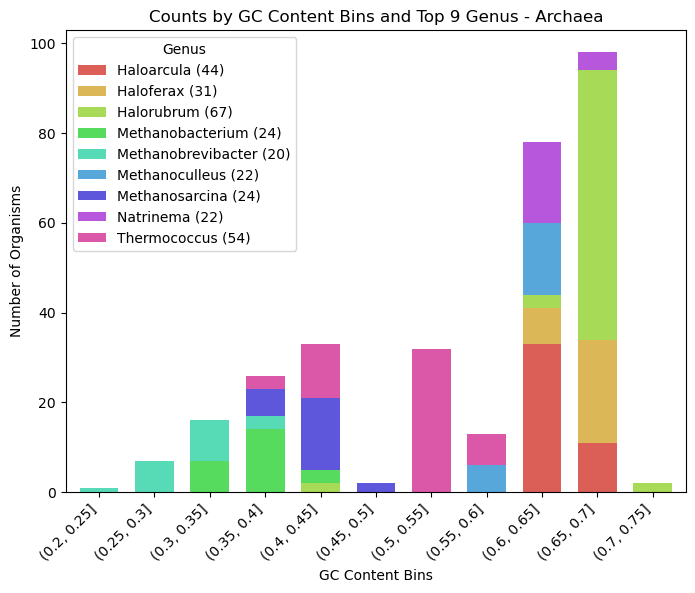

In [105]:
taxon_counts = df_filtered[taxonomic_rank].value_counts()
legend_labels = {
    taxon: f"{taxon} ({count})" for taxon, count in taxon_counts.items()
}

# Generate a color palette with N distinct colors
colors = sns.color_palette('hls', N)

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the stacked bar chart
ax = crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color=colors,  # Use the custom color palette
    width=0.7  # Set the bar width to 1.0 to make bars touch
)

# Update the legend with formatted labels
handles, labels = ax.get_legend_handles_labels()
formatted_labels = [legend_labels[label] for label in labels]
ax.legend(handles, formatted_labels, title=f'{taxonomic_rank.capitalize()}')

# Customize the plot
plt.title(f'Counts by GC Content Bins and Top {N} {taxonomic_rank.capitalize()} - Archaea')
plt.xlabel('GC Content Bins')
plt.ylabel('Number of Organisms')
plt.xticks(rotation=45, ha='right')

# Add a legend with a title and the number of points
# plt.legend(title=f'{taxonomic_rank.capitalize()}')# ({ len(df_filtered)})') })')

# Adjust layout to prevent clipping of tick-labels
# plt.tight_layout()

plt.show()

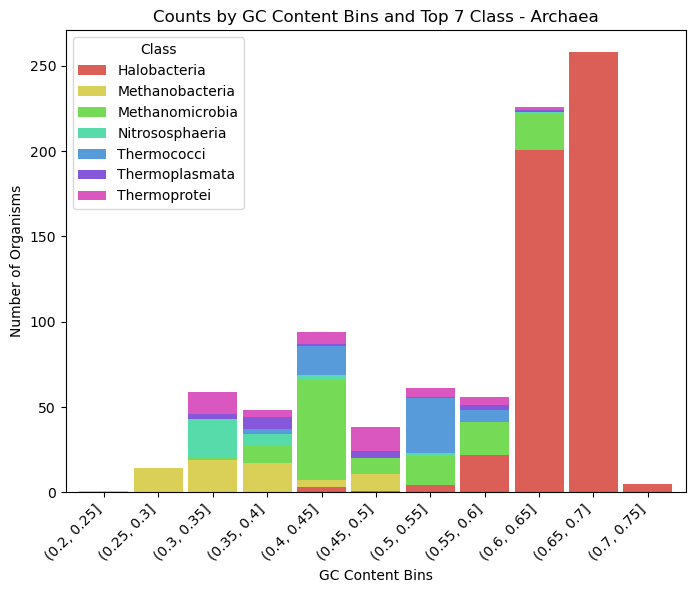

In [57]:
# Generate a color palette with N distinct colors
colors = sns.color_palette('hls', N)

# Plot the stacked bar chart
crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color=colors,
    width=0.9  # Set the bar width to 1.0 to make bars touch
)

# Customize the plot
plt.title(f'Counts by GC Content Bins and Top {N} {taxonomic_rank.capitalize()} - Archaea')
plt.xlabel('GC Content Bins')
plt.ylabel('Number of Organisms')
plt.xticks(rotation=45, ha='right')

# Add a legend with a title
plt.legend(title=taxonomic_rank.capitalize())

# Display the plot
plt.show()
